# Contour functions

Test with simple SSH field from satellite altimitry

In [16]:
%run ../../_setup.py

import numpy as np
from xarray import open_dataset
from oceanpy import Contour, haversine, cartesian_to_natural
import pyproj

import matplotlib.pyplot as plt

In [17]:
# load ssh/ altimetry data
input_file = os.path.join(datadir, 'external', 'ssh', 'rep', 'rep_allsat_phy_l4_135_-60_160_-45_1998.nc')

ssh = open_dataset(input_file)
ssh = ssh.sel(time=slice('1998-03-12', '1998-03-28'), longitude=slice(137, 147), latitude=slice(-52.4, -48))

## Find coordinates of selected contour (ssh=0.1)

In [18]:
cont = Contour(ssh.mean('time'), contour_name='adt', contour_value=0.1, coords=('longitude', 'latitude'))
# cont.get_coords(contour_name='adt', contour_value=0.1, interp=True, spacing=35000)
cont.get_coords(contour_name='adt', contour_value=0.1, interp=False)

## Make cross contour section

In [19]:
# along section
# along_section = cont.along_section(var_name=('ugos', 'vgos'))

# cross section
UTM54 = pyproj.Proj('EPSG:32754')
coord_sel1=(139.1, -49.5)
coord_sel2=(141, -50.5)
coord_sel3=(144.5, -50.5)

cross_section1 = cont.cross_section(coord_sel=coord_sel1, transform=UTM54, npnts=10, spacing=25000)
cross_section2 = cont.cross_section(coord_sel=coord_sel2, transform=UTM54, npnts=10, spacing=25000)
cross_section3 = cont.cross_section(coord_sel=coord_sel3, transform=UTM54, npnts=10, spacing=25000)

/home/janjaapmeijer/miniconda3/envs/ocean3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = N.array(data, dtype=dtype, copy=copy)
/home/janjaapmeijer/miniconda3/envs/ocean3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = N.array(data, dtype=dtype, copy=copy)
/home/janjaapmeijer/miniconda3/envs/ocean3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nest

(137.0, 147.0, -52.5, -48.0)

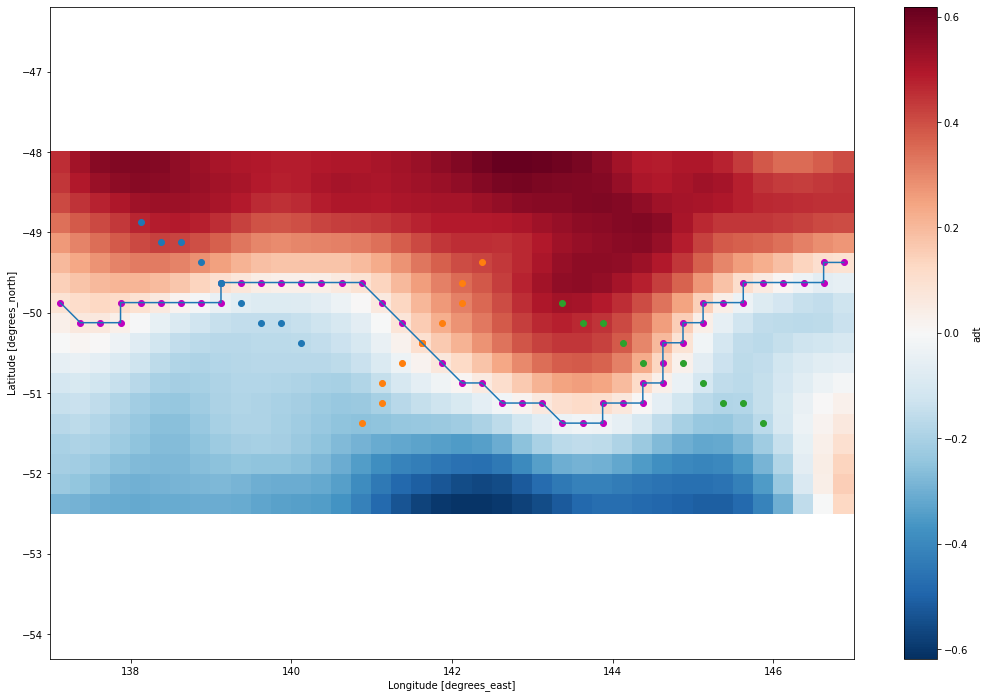

In [27]:
ssh.adt.mean('time').plot(size=12)
plt.plot(*zip(*cont.cont_coords))
along_section.plot.scatter(x='longitude', y='latitude', color='m')
# along_section.plot.quiver(x='longitude', y='latitude', u='ugos', v='vgos', units='inches', width=0.003*12)

# cross sections
cross_section1.plot.scatter(x='longitude', y='latitude')
cross_section2.plot.scatter(x='longitude', y='latitude')
cross_section3.plot.scatter(x='longitude', y='latitude')

plt.axis('equal')

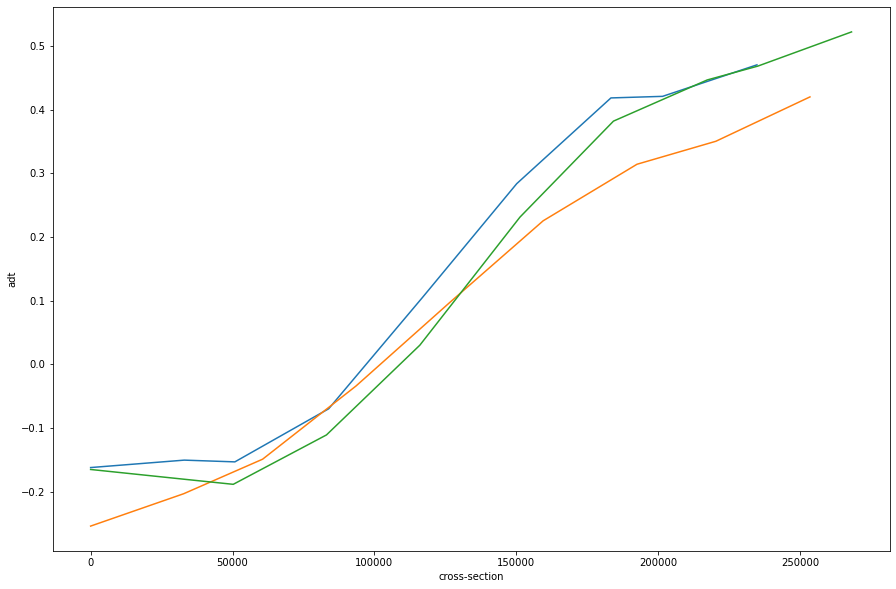

In [25]:
cross_section1.adt.plot(size=10)
cross_section2.adt.plot()
cross_section3.adt.plot()

## Calculate along and across contour velocities

In [22]:
# Calculate cross velocities (if another coordinate system (f.e. u-cells), run again get_coords())
cont = Contour(ssh.mean('time'), coords=('longitude', 'latitude')) #, coords=('xu_ocean', 'yu_ocean')
cont.get_coords(contour_name='adt', contour_value=0.1, interp=False)

# if decompose is True in along section var_name should be tuple (f.e. var_name=('u', 'v')) 
along_section_vel = cont.along_section(var_name=('ugos', 'vgos'), decompose=True)

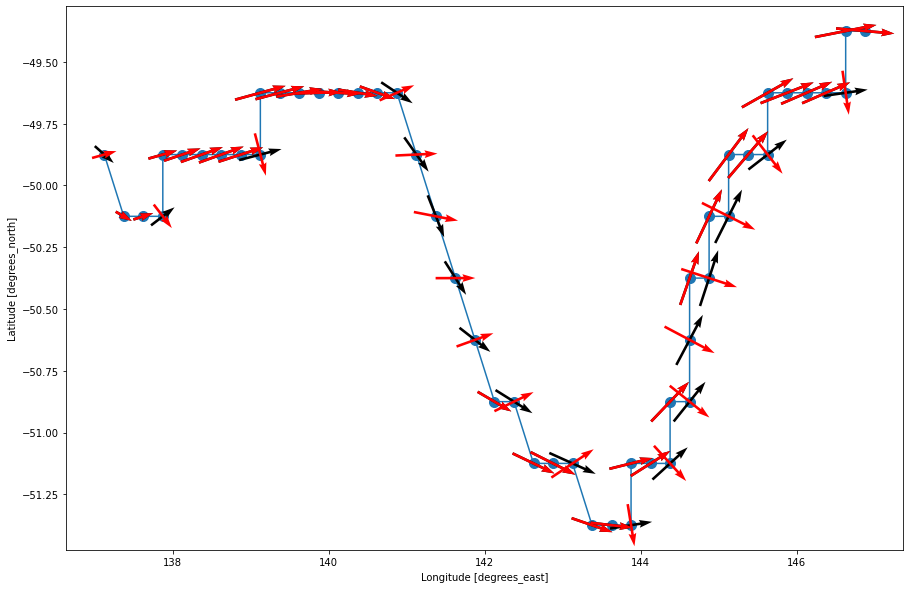

In [33]:
# along_contour_section.plot.quiver(size=10, x='longitude', y='latitude', s=50, color='m')

along_section.plot.quiver(size=10,
    x='longitude', y='latitude', u='ugos', v='vgos', pivot='mid', units='inches', width=0.003*12)
along_section_vel.plot.quiver(
    x='longitude', y='latitude', u='ugost', v='vgosn', color='r', pivot='mid', units='inches', width=0.003*12)

plt.plot(*zip(*cont.cont_coords), '.-', markersize=20, zorder=-1)

# plt.axis('equal')